In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Crop_recommendation (2).csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
8795,13,63,23,31.391055,51.453392,9.181497,42.440543,groundnuts
8796,31,55,17,29.923445,64.416451,8.898774,70.104721,groundnuts
8797,42,51,18,26.608803,50.689086,8.880159,63.918765,groundnuts
8798,11,55,18,27.688200,48.261590,6.013664,38.532547,groundnuts


In [3]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000
mean,55.080909,51.444091,40.482727,26.774572,71.443720,6.609499,100.669506
std,37.059675,27.973451,38.555468,5.322922,22.761454,0.877838,56.017885
min,0.000000,4.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,25.000000,30.000000,20.000000,23.826868,58.192235,6.081469,60.745835
50%,42.000000,51.000000,29.000000,26.924435,79.960550,6.566980,90.402966
75%,89.000000,66.000000,46.000000,29.774256,89.417267,7.086870,122.704272
max,149.000000,150.000000,206.000000,46.732778,104.980970,10.233143,298.560117


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            8800 non-null   int64  
 1   P            8800 non-null   int64  
 2   K            8800 non-null   int64  
 3   temperature  8800 non-null   float64
 4   humidity     8800 non-null   float64
 5   ph           8800 non-null   float64
 6   rainfall     8800 non-null   float64
 7   label        8800 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 550.1+ KB


In [5]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
data.rename(columns = {'N' : 'Nitrogen', 'P' : 'Phosphorus', 'K' : 'Potassium'}, inplace = True)

In [7]:
#Seperate the columns to categorical and numerical columns
cat =data.select_dtypes(exclude = 'number')
num = data.select_dtypes(include= 'number')
print(f'Categorical Variables')
display(cat.head())
print(f'\n\n Numerical Variables')
display(num.head())

Categorical Variables


,label
0,rice
1,rice
2,rice
3,rice
4,rice




 Numerical Variables


,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


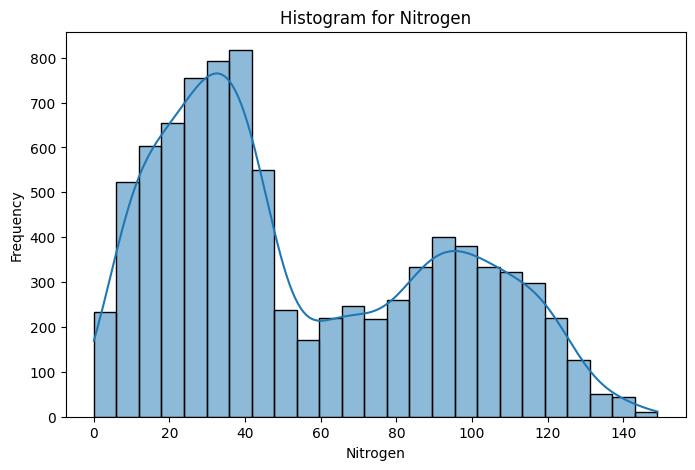

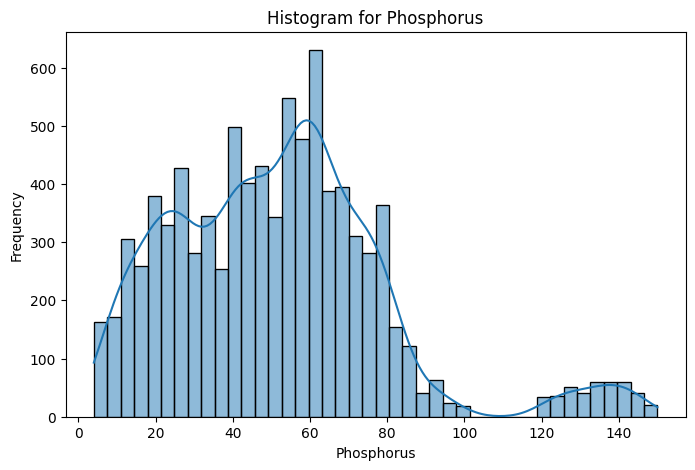

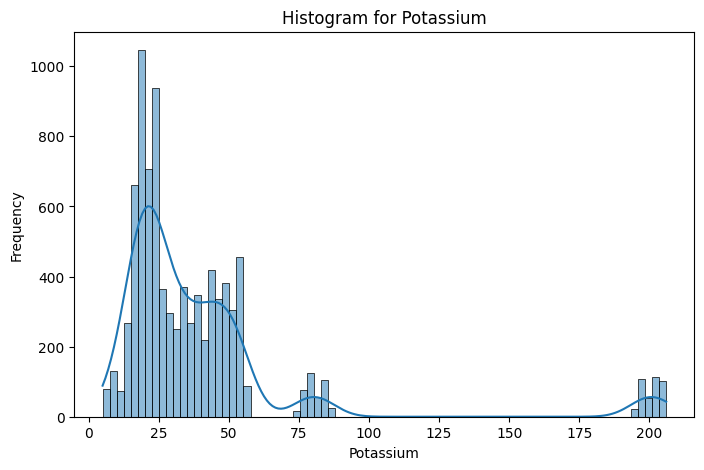

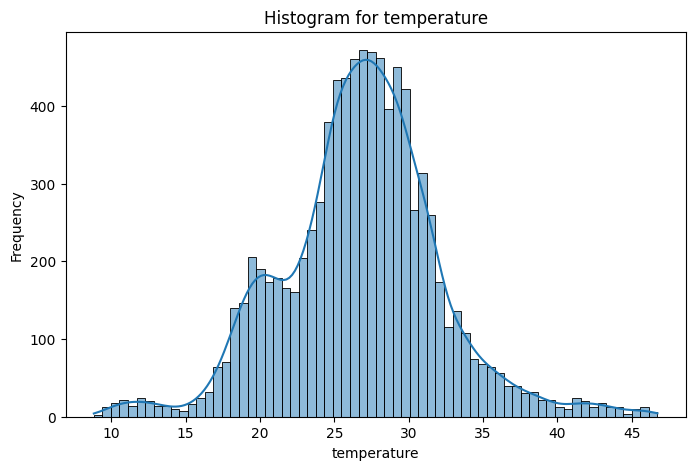

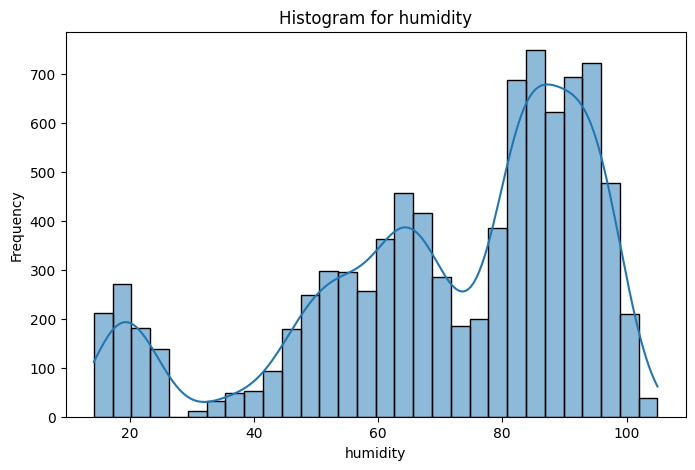

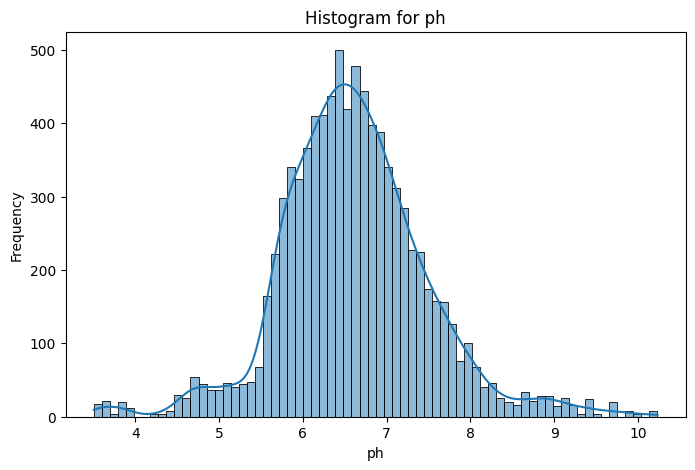

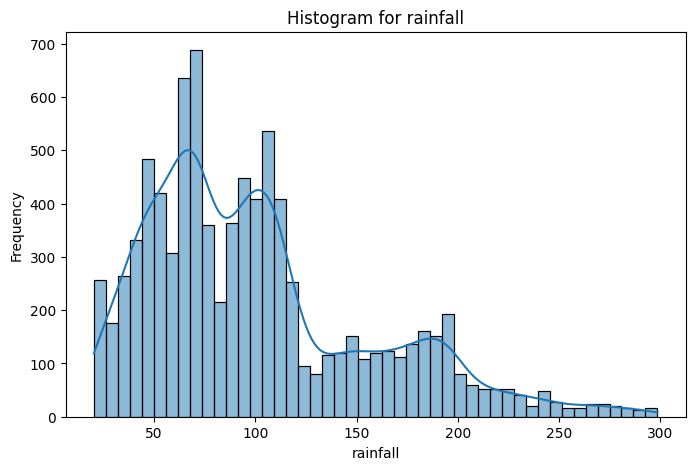

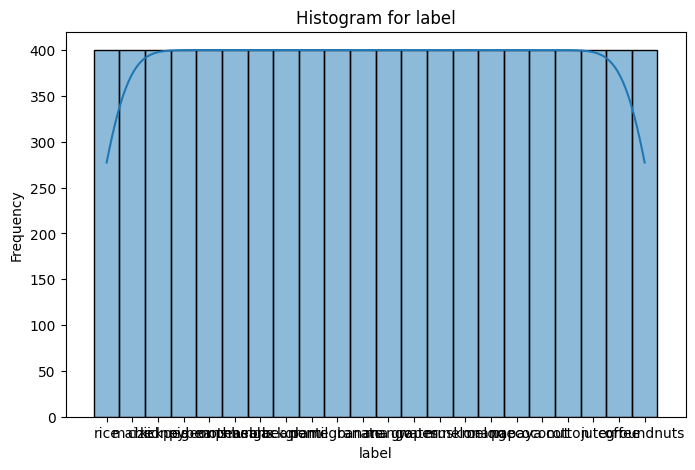

In [8]:
for column in data.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

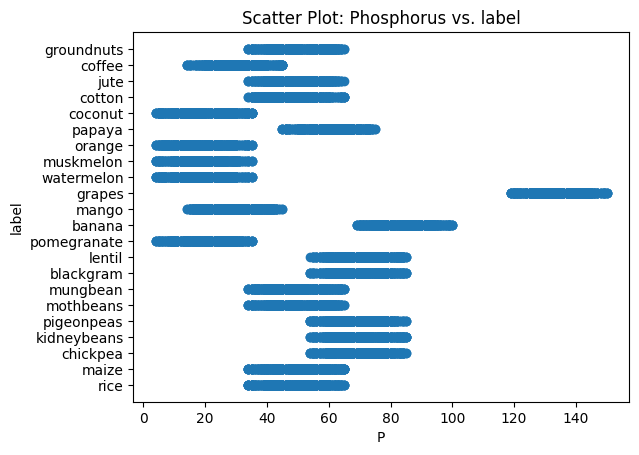

In [10]:
plt.scatter(data['Phosphorus'], data['label'])
plt.title('Scatter Plot: Phosphorus vs. label')
plt.xlabel('P')
plt.ylabel('label')
plt.show()

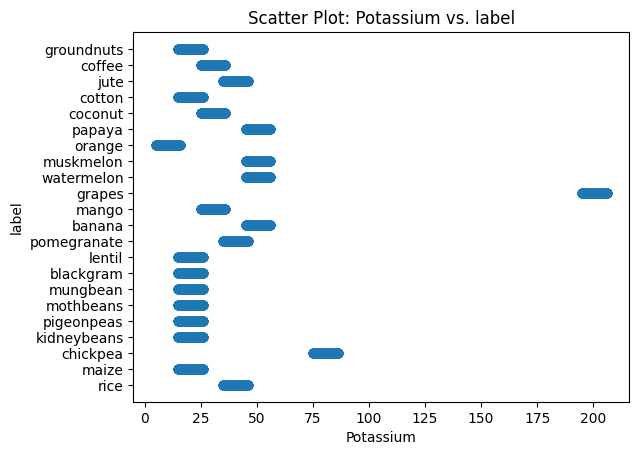

In [13]:
plt.scatter(data['Potassium'], data['label'])
plt.title('Scatter Plot: Potassium vs. label')
plt.xlabel('Potassium')
plt.ylabel('label')
plt.show()

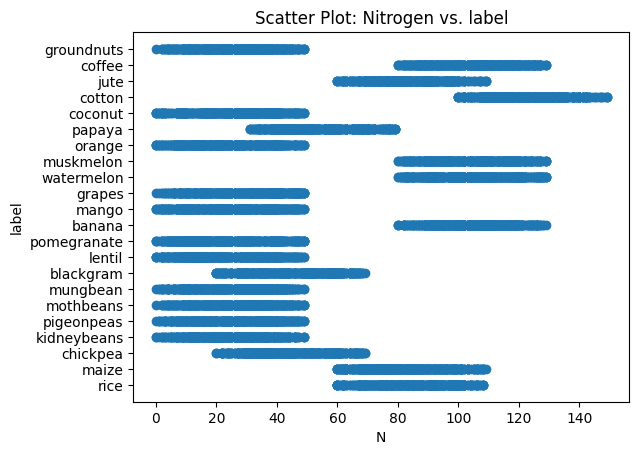

In [14]:
plt.scatter(data['Nitrogen'], data['label'])
plt.title('Scatter Plot: Nitrogen vs. label')
plt.xlabel('N')
plt.ylabel('label')
plt.show()

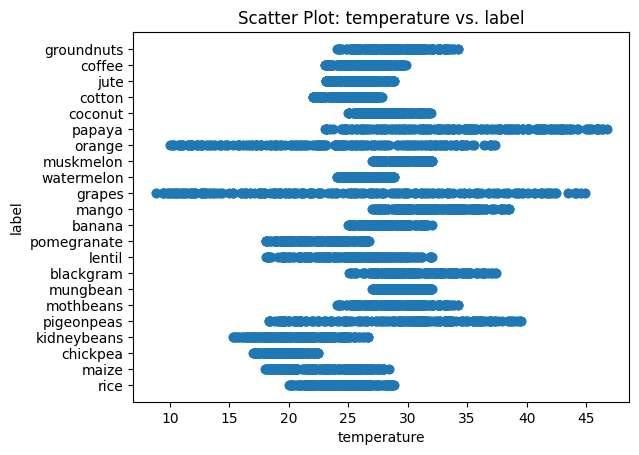

In [15]:
plt.scatter(data['temperature'], data['label'])
plt.title('Scatter Plot: temperature vs. label')
plt.xlabel('temperature')
plt.ylabel('label')
plt.show()

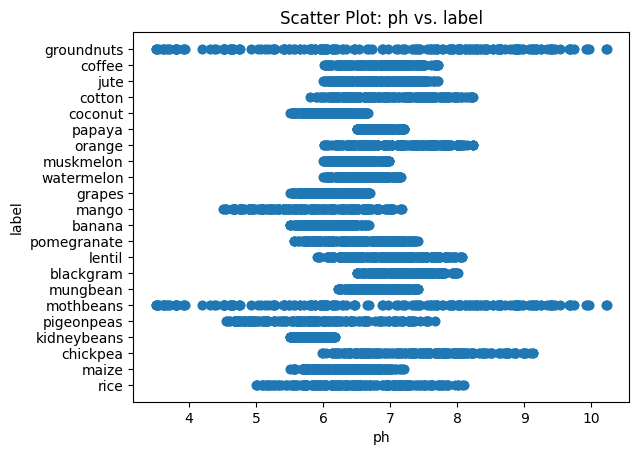

In [16]:
plt.scatter(data['ph'], data['label'])
plt.title('Scatter Plot: ph vs. label')
plt.xlabel('ph')
plt.ylabel('label')
plt.show()

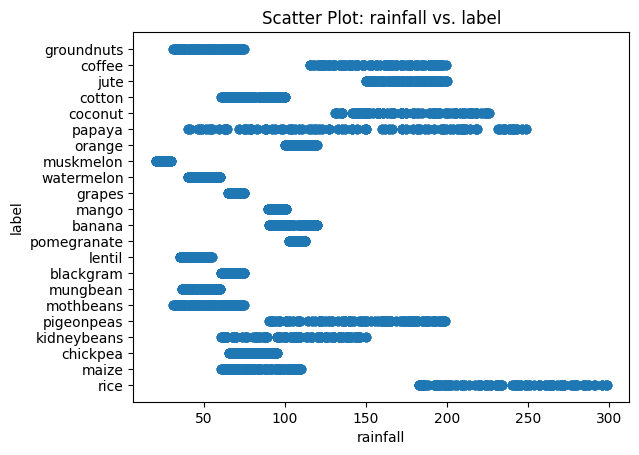

In [17]:
plt.scatter(data['rainfall'], data['label'])
plt.title('Scatter Plot: rainfall vs. label')
plt.xlabel('rainfall')
plt.ylabel('label')
plt.show()

In [23]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



new_data = data.copy()
X = new_data.drop('label', axis = 1)
y = new_data.label




In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        85
   blackgram       1.00      1.00      1.00        85
    chickpea       1.00      1.00      1.00        84
     coconut       1.00      1.00      1.00        78
      coffee       1.00      1.00      1.00        84
      cotton       0.98      0.98      0.98        66
      grapes       1.00      1.00      1.00        73
  groundnuts       0.13      0.12      0.12        94
        jute       0.99      1.00      0.99        82
 kidneybeans       1.00      1.00      1.00        70
      lentil       1.00      1.00      1.00        76
       maize       0.99      0.99      0.99        81
       mango       1.00      1.00      1.00        91
   mothbeans       0.12      0.13      0.12        82
    mungbean       1.00      1.00      1.00        84
   muskmelon       1.00      1.00      1.00        77
      orange       1.00      1.00      1.

In [26]:
acc = []
model = []

In [27]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(X_train,y_train)

predicted_values = DT.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  86.47727272727272
              precision    recall  f1-score   support

      banana       0.89      1.00      0.94        85
   blackgram       0.83      0.95      0.89        85
    chickpea       1.00      1.00      1.00        84
     coconut       1.00      1.00      1.00        78
      coffee       0.93      1.00      0.97        84
      cotton       0.94      1.00      0.97        66
      grapes       1.00      1.00      1.00        73
  groundnuts       0.32      0.27      0.29        94
        jute       0.00      0.00      0.00        82
 kidneybeans       1.00      1.00      1.00        70
      lentil       0.90      0.99      0.94        76
       maize       1.00      0.67      0.80        81
       mango       1.00      1.00      1.00        91
   mothbeans       0.40      0.50      0.45        82
    mungbean       1.00      0.95      0.98        84
   muskmelon       1.00      1.00      1.00        77
      orange       0.95      1.00

### ***Using KNN Algorithm***

In [29]:
features = new_data[['Nitrogen', 'Phosphorus','Potassium','temperature', 'humidity', 'ph', 'rainfall']]
target = new_data['label']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size = 0.2,random_state =2)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

predicted_values = knn.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.9255681818181818
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        74
   blackgram       0.98      1.00      0.99        85
    chickpea       1.00      1.00      1.00        81
     coconut       1.00      1.00      1.00        89
      coffee       1.00      0.99      0.99        90
      cotton       0.99      1.00      0.99        83
      grapes       1.00      1.00      1.00        76
  groundnuts       0.15      0.10      0.12        78
        jute       0.91      0.93      0.92        76
 kidneybeans       1.00      1.00      1.00        88
      lentil       0.99      1.00      0.99        92
       maize       1.00      0.99      0.99        92
       mango       1.00      1.00      1.00        74
   mothbeans       0.22      0.28      0.25        67
    mungbean       1.00      1.00      1.00        91
   muskmelon       1.00      1.00      1.00        81
      orange       1.00      1.00      1.00 

In [32]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.94772727 0.94772727 0.95       0.94488636 0.94090909]


In [33]:
#Print Train Accuracy
knn_train_accuracy = knn.score(X_train,y_train)
print("knn_train_accuracy = ",knn.score(X_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(X_test,y_test)
print("knn_test_accuracy = ",knn.score(X_test,y_test))

knn_train_accuracy =  0.9552556818181818
knn_test_accuracy =  0.9255681818181818


In [ ]:
import joblib
joblib.dump(DT, open('croprecommendation.pkl', 'wb'))

In [ ]:

import joblib
joblib.dump(random_forest, open('croprecommendationRF.pkl', 'wb'))
